In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

In [465]:
import warnings
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [466]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [467]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [468]:
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count / len(df)
    print(f"{col}: {zero_count} % {zero_percentage:.2f}")

Glucose: 5 % 0.65
BloodPressure: 35 % 4.56
SkinThickness: 227 % 29.56
Insulin: 374 % 48.70
BMI: 11 % 1.43


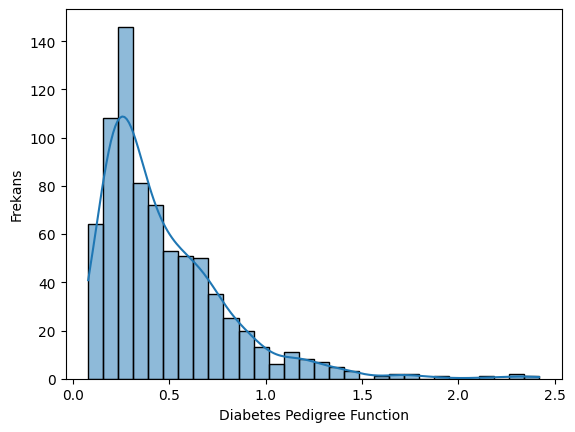

In [469]:
sns.histplot(df['DiabetesPedigreeFunction'], bins = 30, kde = True)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

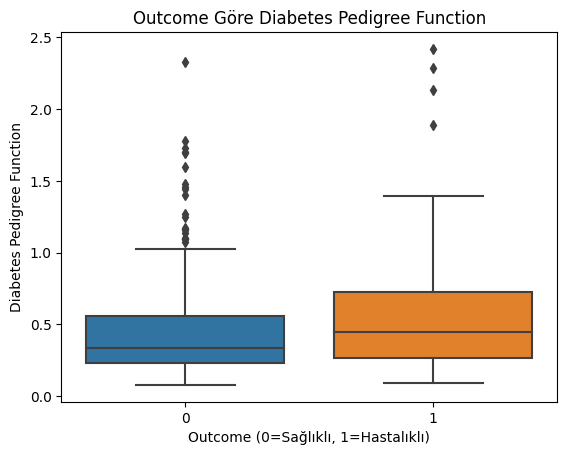

In [470]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome Göre Diabetes Pedigree Function')
plt.xlabel('Outcome (0=Sağlıklı, 1=Hastalıklı)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

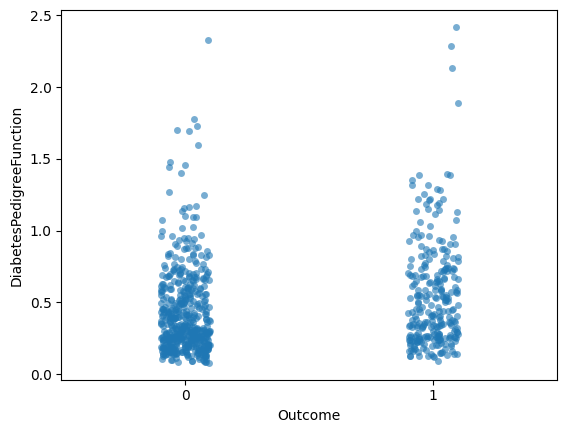

In [471]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.show()

In [472]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.2, random_state=15)

In [474]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


In [475]:
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0,median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [476]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [477]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [478]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [479]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)


In [480]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       108
           1       0.55      0.63      0.59        46

    accuracy                           0.73       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.75      0.73      0.74       154

0.7337662337662337
[[84 24]
 [17 29]]


In [481]:
from sklearn.model_selection import GridSearchCV

In [482]:
adaboost_param ={
    "n_estimators" : [50, 70, 100, 120, 150, 200], 
    "learning_rate" : [0.001, 0.01, 0,1, 1, 10]
    
}

In [483]:
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 3, verbose= 1, n_jobs = -1)

In [484]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0, 1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [485]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [486]:
ada = AdaBoostClassifier(learning_rate =1, n_estimators =200)

In [487]:
ada.fit(X_train, y_train)
y_pred =ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       108
           1       0.53      0.52      0.53        46

    accuracy                           0.72       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.72      0.72      0.72       154

0.7207792207792207
[[87 21]
 [22 24]]


In [488]:
drop_cols = ["Insulin", "SkinThickness"]
df_clean = df.drop(columns=drop_cols)

In [489]:
X = df_clean.drop("Outcome", axis=1)
y = df_clean["Outcome"]

In [490]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15)

In [491]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [492]:
log_reg = LogisticRegression(max_iter=1000, random_state=15)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=15)

In [493]:
y_pred_lr = log_reg.predict(X_test)

In [494]:
print("📊 Logistic Regression Sonuçları")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

📊 Logistic Regression Sonuçları
Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[89 19]
 [19 27]]


In [495]:
from sklearn.ensemble import RandomForestClassifier

In [496]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=15)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [497]:
y_pred_rf = rf_clf.predict(X_test)

In [498]:
print("📊 Random Forest Sonuçları")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

📊 Random Forest Sonuçları
Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.55      0.57      0.56        46

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.74      0.73      0.73       154

Confusion Matrix:
 [[87 21]
 [20 26]]


In [499]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [500]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=15))
])


In [501]:
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("📊 SVM (RBF) Sonuçları")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

📊 SVM (RBF) Sonuçları
Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

Confusion Matrix:
 [[87 21]
 [16 30]]


In [502]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [503]:
knn_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, weights="uniform"))
])

In [504]:
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

In [505]:
print("📊 KNN Sonuçları")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

📊 KNN Sonuçları
Accuracy: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       108
           1       0.62      0.65      0.64        46

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
 [[90 18]
 [16 30]]


In [506]:
models_preds = {
    "LogisticRegression": ("y_pred_lr" in globals(), "y_pred_lr"),
    "RandomForest":       ("y_pred_rf" in globals(), "y_pred_rf"),
    "SVM-RBF":            ("y_pred_svm" in globals(), "y_pred_svm"),
    "KNN":                ("y_pred_knn" in globals(), "y_pred_knn"),
    "AdaBoost":           ("y_pred_ada" in globals(), "y_pred_ada"),
}

In [507]:
rows = []
for name, (exists_flag, pred_var) in models_preds.items():
    if not exists_flag:
        continue
    y_pred = globals()[pred_var]
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0)
    })


In [508]:
results_df = pd.DataFrame(rows).sort_values("F1", ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy,Precision,Recall,F1
0,KNN,0.779221,0.625000,0.652174,0.638298
1,SVM-RBF,0.759740,0.588235,0.652174,0.618557
2,LogisticRegression,0.753247,0.586957,0.586957,0.586957
3,RandomForest,0.733766,0.553191,0.565217,0.559140
